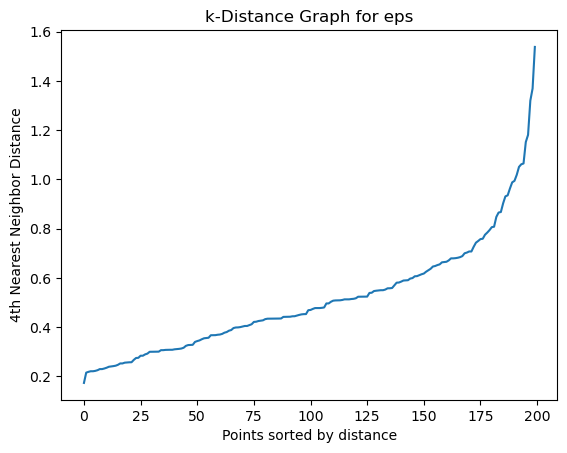

Cluster counts: Cluster
 0    137
 1     35
-1     28
Name: count, dtype: int64
Silhouette Score: 0.188


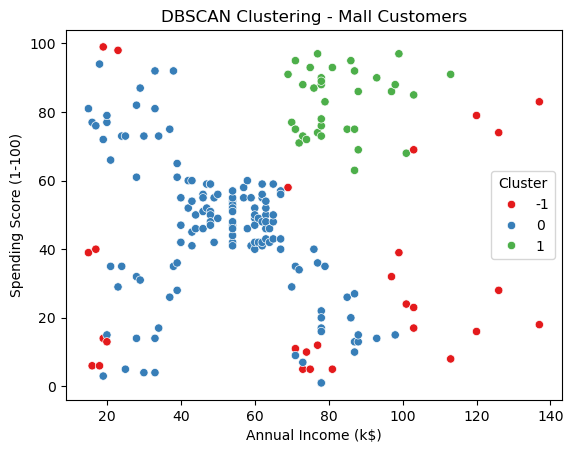

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import numpy as np

df=pd.read_csv("Mall_Customers.csv")
X=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit=neighbors.fit(X_scaled)
distances,indices= neighbors_fit.kneighbors(X_scaled)

distances=np.sort(distances[:,4])
plt.plot(distances)
plt.title("k-Distance Graph for eps")
plt.xlabel("Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()

db=DBSCAN(eps=0.6,min_samples=5).fit(X_scaled)
labels=db.labels_

df["Cluster"]=labels

print("Cluster counts:",df["Cluster"].value_counts())

if len(set(labels))>1:
    score=silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("Silhouette Score not defined (only one cluster found)")

sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster"],
    palette="Set1"
)
plt.title("DBSCAN Clustering - Mall Customers")
plt.show()
